In [1]:
#!pip install -U transformers
#!pip install -U accelerate
#!pip instll  -U datasets
#!pip install -U bertviz
#!pip install -U umap-learn
#!pip install seaborn --upgrade

In [2]:
import pandas as pd
import os

In [3]:
os.getcwd()

'/content'

In [4]:
raw_data = pd.read_csv('/content/twitter_multi_class_sentiment.csv')
df = raw_data.copy()
df

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness
15996,i am now turning and i feel pathetic that i am...,0,sadness
15997,i feel strong and good overall,1,joy
15998,i feel like this was such a rude comment and i...,3,anger


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        16000 non-null  object
 1   label       16000 non-null  int64 
 2   label_name  16000 non-null  object
dtypes: int64(1), object(2)
memory usage: 375.1+ KB


In [6]:
df.describe()

,label
count,16000.000000
mean,1.565937
std,1.501430
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,5.000000


In [7]:
df['label'].value_counts()

,count
label,
1,5362
0,4666
3,2159
4,1937
2,1304
5,572


In [8]:
import matplotlib.pyplot as plt


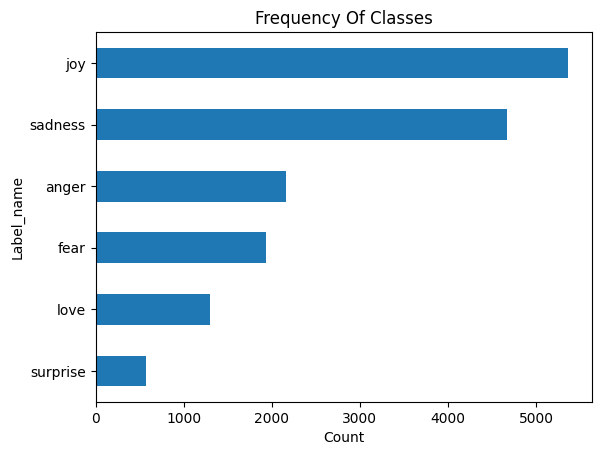

In [9]:
label_counts = df['label_name'].value_counts(ascending=True)
label_counts.plot(kind='barh')
plt.title('Frequency Of Classes')
plt.xlabel('Count')
plt.ylabel('Label_name')
plt.show()


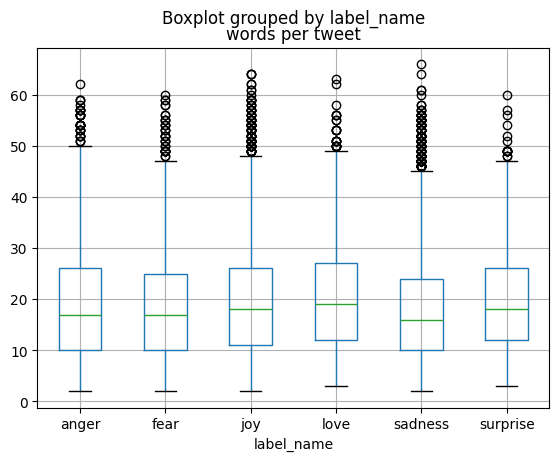

In [10]:
df['words per tweet'] = df['text'] .str.split().apply(len)
df.boxplot('words per tweet', by='label_name')

plt.show()

In [11]:
from transformers import AutoTokenizer

model_ckpt = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

text = "I love machine learing! Tokenization is awesome"
encoded_text = tokenizer(text)
print(encoded_text)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

{'input_ids': [101, 1045, 2293, 3698, 26511, 2075, 999, 19204, 3989, 2003, 12476, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [12]:

encoded_text

{'input_ids': [101, 1045, 2293, 3698, 26511, 2075, 999, 19204, 3989, 2003, 12476, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [13]:
len(tokenizer.vocab), tokenizer.vocab_size, tokenizer.model_max_length

(30522, 30522, 512)

# Data Loader and trian Test split

In [14]:
 from sklearn.model_selection import train_test_split

 train, test = train_test_split(df, test_size=0.3, random_state=42, stratify=df['label_name'])
 test, validation = train_test_split(test, test_size=1/3, random_state=42, stratify=test['label_name'])

 train.shape, validation.shape, test.shape

((11200, 4), (1600, 4), (3200, 4))

In [15]:
from datasets import Dataset, DatasetDict

dataset = DatasetDict({
    'train': Dataset.from_pandas(train, preserve_index=False),
    'validation': Dataset.from_pandas(validation, preserve_index=False),
    'test': Dataset.from_pandas(test, preserve_index=False)
})

dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'words per tweet'],
        num_rows: 11200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'words per tweet'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'words per tweet'],
        num_rows: 3200
    })
})

In [16]:
dataset['train'][1]

{'text': 'i was feeling brave when i bought it and clearly when i was doing my makeup',
 'label': 1,
 'label_name': 'joy',
 'words per tweet': 16}

In [17]:
def tokenize(batch):
  temp = tokenizer(batch['text'], padding=True, truncation=True)
  return temp


print(tokenize(dataset['train'][:2]))

{'input_ids': [[101, 1045, 2514, 12511, 2009, 2003, 2053, 2393, 2005, 2033, 2008, 2060, 5381, 2360, 2008, 1045, 2572, 3407, 2129, 2172, 3606, 2045, 2089, 2022, 1999, 2009, 102], [101, 1045, 2001, 3110, 9191, 2043, 1045, 4149, 2009, 1998, 4415, 2043, 1045, 2001, 2725, 2026, 5789, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}


In [18]:
emotion_encoded = dataset.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/11200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

In [19]:
emotion_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'words per tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 11200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'words per tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'words per tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3200
    })
})

In [20]:
label2id = {x['label_name']:x['label'] for x in dataset['train']}
id2label = {v:k for k,v in label2id.items()}

label2id, id2label

({'sadness': 0, 'joy': 1, 'fear': 4, 'surprise': 5, 'anger': 3, 'love': 2},
 {0: 'sadness', 1: 'joy', 4: 'fear', 5: 'surprise', 3: 'anger', 2: 'love'})

# Model Building

In [21]:
from transformers import AutoModel
import torch

In [22]:
model = AutoModel.from_pretrained(model_ckpt)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [23]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [24]:
from transformers import AutoModelForSequenceClassification, AutoConfig

num_labels = len(label2id)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
config = AutoConfig.from_pretrained(model_ckpt, num_labels=num_labels, label2id=label2id, id2label=id2label)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [25]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [26]:
from transformers import TrainingArguments

batch_size = 64
training_dir = "ber_base_train_dir"
trianing_args = TrainingArguments(
    output_dir=training_dir,
    overwrite_output_dir=True,
    num_train_epochs = 2,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay = 0.01,
    eval_strategy = 'epoch',
    disable_tqdm = False
)

In [27]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.6 MB/s eta 0:00:00


In [28]:
import evaluate
import numpy as np

def compute_metrics(eval_pred):
  metric = evaluate.load('accuracy')
  logits, labels = eval_pred
  predictions = np.argmax(predictions, axis=-1)
  return metric.compute(predictions=predictions, references=labels)


In [29]:
# use sklearn to build compute metrics
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)

  f1 = f1_score(y_true=labels, y_pred=preds, average='weighted')
  acc = accuracy_score(y_true=labels, y_pred=preds)

  return {'accuracy': acc, 'f1': f1}

# Building Model and Trainer

In [30]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=trianing_args,
    train_dataset=emotion_encoded['train'],
    eval_dataset=emotion_encoded['validation'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

/tmp/ipython-input-2855404737.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [31]:
trainer.train()

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: slimsnaps (slimsnaps-slimsnaps) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.442484,0.861875,0.851169
2,No log,0.256053,0.919375,0.919246


TrainOutput(global_step=350, training_loss=0.7030582101004464, metrics={'train_runtime': 714.4016, 'train_samples_per_second': 31.355, 'train_steps_per_second': 0.49, 'total_flos': 1001502421516800.0, 'train_loss': 0.7030582101004464, 'epoch': 2.0})

# Model Evaluation

In [32]:
preds_output = trainer.predict(emotion_encoded['test'])
preds_output.metrics

{'test_loss': 0.29340052604675293,
 'test_accuracy': 0.90875,
 'test_f1': 0.9080306682464054,
 'test_runtime': 12.8344,
 'test_samples_per_second': 249.329,
 'test_steps_per_second': 3.896}

In [33]:
preds_output.predictions

array([[-0.7398478 , -0.6131976 , -0.98080194,  3.4940114 , -0.39708364,
        -1.0068305 ],
       [ 4.3975263 , -0.2622412 , -0.8542496 ,  0.05967519, -1.2311815 ,
        -1.4062961 ],
       [-1.0445465 , -1.3344485 , -0.7648009 , -0.28296652,  3.720335  ,
         0.04468377],
       ...,
       [-1.0665925 , -1.2153305 , -1.3914461 , -0.6510141 ,  2.0760877 ,
         1.6179326 ],
       [-0.8790171 ,  3.2400246 ,  2.4293761 , -1.7616677 , -1.5724728 ,
        -0.6669961 ],
       [-0.7777179 ,  3.9619124 , -0.2822951 , -1.6772963 , -1.2970971 ,
        -0.57874376]], dtype=float32)

In [34]:
y_pred = np.argmax(preds_output.predictions, axis=-1)
y_pred

array([3, 0, 4, ..., 4, 1, 1])

In [35]:
y_pred = np.argmax(preds_output.predictions, axis=-1)
y_test = emotion_encoded['test'][:]['label']

In [36]:
emotion_encoded['test'][0]

{'text': 'i feel so pissed of for the fact that i am not that talented and creative as many others designers are',
 'label': 3,
 'label_name': 'anger',
 'words per tweet': 21,
 'input_ids': [101,
  1045,
  2514,
  2061,
  9421,
  1997,
  2005,
  1996,
  2755,
  2008,
  1045,
  2572,
  2025,
  2008,
  10904,
  1998,
  5541,
  2004,
  2116,
  2500,
  11216,
  2024,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'token_type_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'attention_mask': [1,
  1,
  1,

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       933
           1       0.93      0.92      0.93      1072
           2       0.80      0.76      0.78       261
           3       0.93      0.90      0.91       432
           4       0.87      0.93      0.90       387
           5       0.84      0.70      0.77       115

    accuracy                           0.91      3200
   macro avg       0.88      0.86      0.87      3200
weighted avg       0.91      0.91      0.91      3200



In [38]:
label2id

{'sadness': 0, 'joy': 1, 'fear': 4, 'surprise': 5, 'anger': 3, 'love': 2}

In [39]:
# plotting the confusiion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

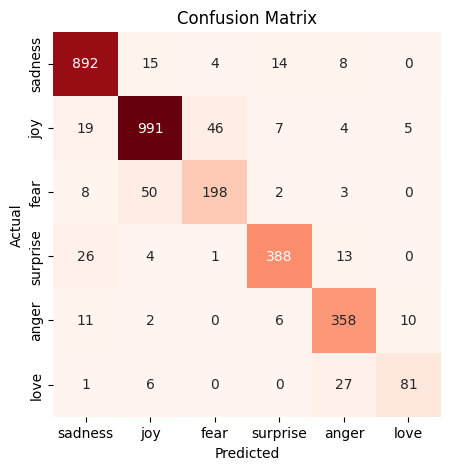

In [40]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, xticklabels=label2id.keys(), yticklabels=label2id.keys(), fmt="d", cbar=False, cmap="Reds" )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Build Prediction Function and Store Model

In [41]:
text = "i am super happy today. i got it done. finally!!"

def get_prediction(text):
  input_encoded = tokenizer(text, return_tensors='pt').to (device)

  with torch.no_grad():
    output = model(**input_encoded)

  logits = output.logits

  pred = torch.argmax(logits, dim=1).item()
  return id2label[pred]

get_prediction(text)

'joy'

In [42]:
trainer.save_model("bert-base uncased-sentiment-model")

In [43]:
# use pipeline method for prediction

from transformers import pipeline


classifier = pipeline('text-classification', model='./bert-base uncased-sentiment-model')

classifier([text, 'hello how are you?', 'i love you', 'i am feeling low'])

Device set to use cuda:0


[{'label': 'joy', 'score': 0.9555520415306091},
 {'label': 'joy', 'score': 0.5821851491928101},
 {'label': 'love', 'score': 0.6854265928268433},
 {'label': 'sadness', 'score': 0.9686619639396667}]

# Building Streamlit App

In [46]:
import pandas as pd
import streamlit as st
import numpy as np


In [47]:
st.title('Fine Tuning BERT for Sentiment Analysis')

classifier = pipeline('text-classification', model='bert-base-uncased-sentiment-model')

text = st.text_area('Enter text')

if st.button('predict'):
  result = classifier(text)
  st.write(result)

2025-09-01 09:15:13.337 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-01 09:15:13.954 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-09-01 09:15:13.956 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-01 09:15:13.957 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


OSError: bert-base-uncased-sentiment-model is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `hf auth login` or by passing `token=<your_token>`